In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data
spoofingData = pd.read_csv("spoofingSupervisedClassification.csv")
#spoofingData.drop('timestamp', axis=1, inplace=True)
spoofingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 9 columns):
data0    60000 non-null int64
data1    60000 non-null int64
data2    60000 non-null int64
data3    60000 non-null int64
data4    60000 non-null int64
data5    60000 non-null int64
data6    60000 non-null int64
data7    60000 non-null int64
flag     60000 non-null int64
dtypes: int64(9)
memory usage: 4.1 MB


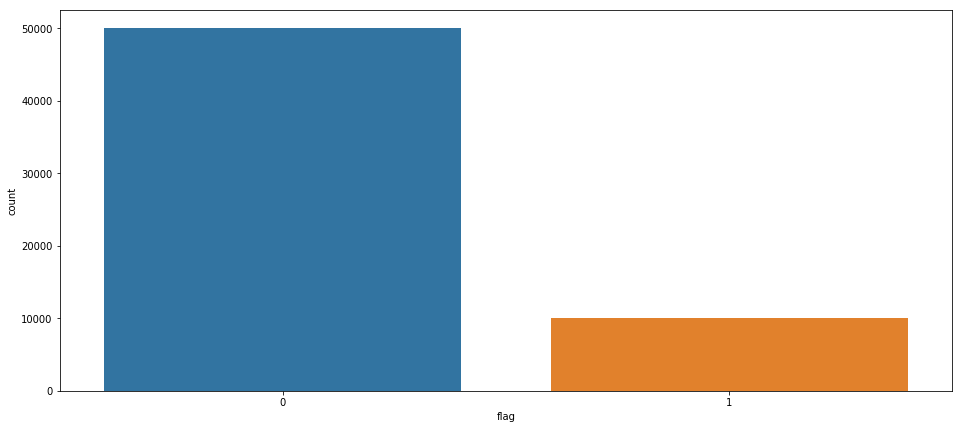

In [3]:
# class distribution
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot("flag",data=spoofingData)

In [4]:
#Create data = x
Cls_X = spoofingData.copy()

#create target = Y
Cls_y = Cls_X.flag

print('X shape before ')
print(Cls_X.shape)

#drop the response column from the x dataset
Cls_X.pop('flag') #drop 'flag'

print('X shape after ')
print(Cls_X.shape)
print('Y shape after ')
print(Cls_y.shape)

X shape before 
(60000, 9)
X shape after 
(60000, 8)
Y shape after 
(60000,)


In [5]:
def getRandomList(n):
    data = []
    for i in range(n):
        data.append(np.random.randint(0,255))
    return data

randomPayload = pd.DataFrame.from_dict({"data0":[], "data1": [], "data2": [], "data3": [],
                             "data4": [], "data5": [], "data6": [], "data7": []})
for i in range(8):
    col = "data" + str(i)
    randomPayload[col] = getRandomList(1000)

In [6]:
randomPayload.head()

,data0,data1,data2,data3,data4,data5,data6,data7
0,151,244,56,208,59,97,145,207
1,80,79,5,216,102,247,85,44
2,82,22,52,173,1,180,118,32
3,234,253,111,132,72,8,119,42
4,110,158,20,234,228,62,65,239


In [7]:
randomPayload['flag'] = 1

In [8]:
# create X_new and y_new from random payload
X_new = randomPayload.iloc[:, 0:8]
y_new = randomPayload.flag

# get some goodpackets and badpackets
goodPackets = spoofingData.loc[spoofingData.flag == 0]
badPackets = spoofingData.loc[spoofingData.flag == 1]

# pick 1000 each of good packets and bad packets
small_badPackets = badPackets.iloc[:1000,]
small_goodPackets = goodPackets.iloc[:1000,]

In [9]:
# construct the dataframe with a mix of good packets, bad packets and random packets
X_new_good = small_goodPackets.iloc[:, 0:8]
y_new_good = small_goodPackets.flag

X_new_bad = small_badPackets.iloc[:, 0:8]
y_new_bad = small_badPackets.flag

X_full = pd.concat([X_new, X_new_good, X_new_bad], axis = 0)
y_full = pd.concat([y_new, y_new_good, y_new_bad], axis = 0)

In [10]:
print(X_full.shape)
print(y_full.shape)

(3000, 8)
(3000,)


In [11]:
X_full.to_pickle('X_full.pickle')
y_full.to_pickle('y_full.pickle')

### Training using cross-validation

Train the following models:

`Linear Models`:
- Logistic Regression
- SVC
- Linear Discriminant Analysis (LDA)

`Non-Linear Models`:
- Decision Tree
- KNN
- Naive Bayes

In [13]:
# Import classes
# model selection
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# linear classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# non-linear classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [14]:
df_X = Cls_X
df_y = Cls_y

In [15]:
%%time
# prepare models
models = []
models.append(("LogReg", LogisticRegression()))
models.append(("LogReg_C2", LogisticRegression(C=2)))
models.append(("LogReg_C10", LogisticRegression(C=10)))
models.append(("SVM", SVC()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


# declare results
results = []

# declare names to hold model names
names = []

scoring='roc_auc'

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=4)
    cv_results = cross_val_score(model, df_X, df_y, cv=kfold, scoring=scoring)
    results.append(cv_results) 
    names.append(name) 
    print("%s: %f" %(name, cv_results.mean()))

LogReg: 1.000000
LogReg_C2: 1.000000
LogReg_C10: 1.000000
SVM: 1.000000
LDA: 0.999800
KNN: 1.000000
CART: 1.000000
NB: 1.000000
CPU times: user 35.5 s, sys: 1.06 s, total: 36.5 s
Wall time: 36.2 s


In [16]:
df_X = X_full
df_y = y_full

In [17]:
%%time
# prepare models
models = []
models.append(("LogReg", LogisticRegression()))
models.append(("LogReg_C2", LogisticRegression(C=2)))
models.append(("LogReg_C10", LogisticRegression(C=10)))
models.append(("SVM", SVC()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


# declare results
results = []

# declare names to hold model names
names = []

scoring='roc_auc'

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=4)
    cv_results = cross_val_score(model, df_X, df_y, cv=kfold, scoring=scoring)
    results.append(cv_results) 
    names.append(name) 
    print("%s: %f" %(name, cv_results.mean()))

LogReg: 0.964354
LogReg_C2: 0.964504
LogReg_C10: 0.963151
SVM: 0.986464
LDA: 0.959298
KNN: 0.995808
CART: 0.995192
NB: 0.927161
CPU times: user 1.87 s, sys: 31.9 ms, total: 1.9 s
Wall time: 1.73 s


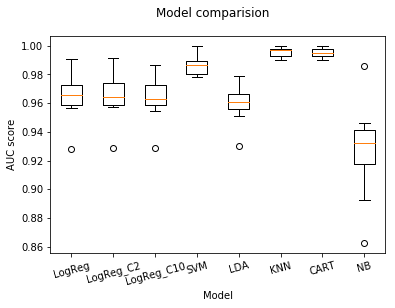

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Model comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel("Model")
plt.ylabel("AUC score")
ax = ax.set_xticklabels(names, rotation='15')